**Data Wrangling/EDA for the Store Sales Kaggle Competition/DS Project**

Name, Computing Id:
1. Esha Sharma, exy8eb
2. Celestine Nguyen, haw3wk
3. ADD YOUR NAMES AND COMPUTING IDs

In [ ]:
! git clone https://github.com/CelestineNguyen/DS3001_SalesProject

Cloning into 'DS3001_SalesProject'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 48 (delta 12), reused 33 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 15.25 KiB | 7.63 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Filtering content: 100% (7/7), 119.12 MiB | 28.56 MiB/s, done.


In [ ]:
#Data Set: https://www.kaggle.com/competitions/store-sales-time-series-forecasting

**Describe key values in the dataset. **

The Stores Sales Kaggle Competition comes with 7 csv files with it.
1. *samplesubmission.csv*: This csv includes two vars (id, sales). The id represents the product id and the sales represents the sales that the product will have in the future (in this competition it will be the next 15 days after the last recorded date). This csv is just a csv that shows the format for the kaggle competition submission. Both of these are key variables.

2. *train.csv*: This csv contains training data with store_nbr, family, onpromotion, and sales. The key variables here are the sales and family variables as we can categorize the item and also see the total sales for that product on a certain date.

3. *test.csv*: Simply contains the 15 dates that we will be creating target sales numbers for.

4. *stores.csv*: A Csv that contains all the different Favorita Grocery Stores. It has the following varaibles: city, state, type, and cluster. Cluster allows us to see which stores are in relatively similar locations. The city could be a key variable as heavily populated cities could be an indicator of more sales for a particular product.

5. *oil.csv*: Includes dates and the daily oil price: Due to Ecuador being oil-dependent, the economy (therefore prices and hence sales) may also get affected. This could be a key variable to be investigated.

6. *holidays_events.csv*: Includes date, type, locale, locale_name, description
transferred variables. Holidays can close stores on the specific day, but can increase sales of certain products around the holiday days. It is also good to note any government holidays that mean people have a day off, but the stores are still open. Hence, the date and type along with transferred variables could be key variables to finding out any patterns in sales for products.

7. *transactions.csv*: Includes the date, store_nbr, and transactions. All of these variables are key as we must know the date, which store and total number of transactions for that store.

In [18]:
import pandas as pd
import numpy as np

In [133]:

# Relevant Plots - Jenn
# get train.csv
# get stores.csv
# get oil.csv
# get holiday_events.csv
# get transactions.csv
def load_train_data():
    return pd.read_csv("data/train.csv", low_memory=False)

def load_store_data():
    return pd.read_csv("data/stores.csv", low_memory=False)

def load_oil_data():
    return pd.read_csv("data/oil.csv", low_memory=False)

def load_holiday_data():
    return pd.read_csv("data/holidays_events.csv", low_memory=False)

def load_transaction_data():
    return pd.read_csv("data/transactions.csv", low_memory=False)

training_set = pd.DataFrame(load_train_data())
store_data = load_store_data()
oil_data = pd.DataFrame(load_oil_data())
holiday_data = load_holiday_data()
transaction_data = load_transaction_data()


In [136]:
# CLEANING SOME DATA
training_set['date'] = pd.to_datetime(training_set['date'], format="%Y-%m-%d")
oil_data['date'] = pd.to_datetime(oil_data['date'], format="%Y-%m-%d")
holiday_data['date'] = pd.to_datetime(holiday_data['date'], format="%Y-%m-%d")
training_set['day_of_week'] = training_set['date'].dt.day_name()
training_set['year'] = training_set['date'].dt.year
training_set_12_15 = training_set.loc[(training_set['date'] >= '2012-01-01') & (training_set['date'] <= '2015-12-31')]


[]

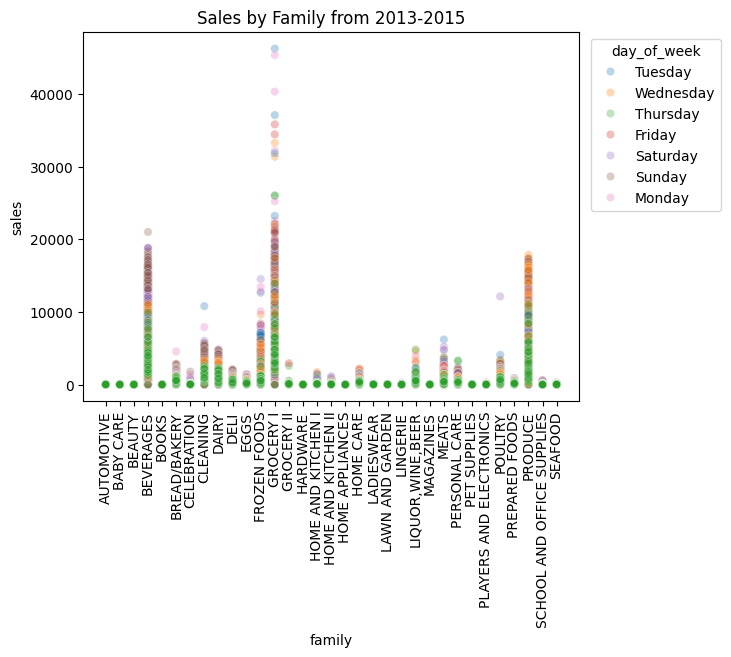

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

this_plot = sns.scatterplot(data=training_set_12_15,x='family',y='sales',hue='day_of_week',alpha=0.3)
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.3, 1))
labels = training_set_12_15['family'].unique()
this_plot.set_xticks(range(len(labels)))
this_plot.set_title("Sales by Family from 2013-2015")
this_plot.set_xticklabels(labels, rotation=90)
this_plot.plot()



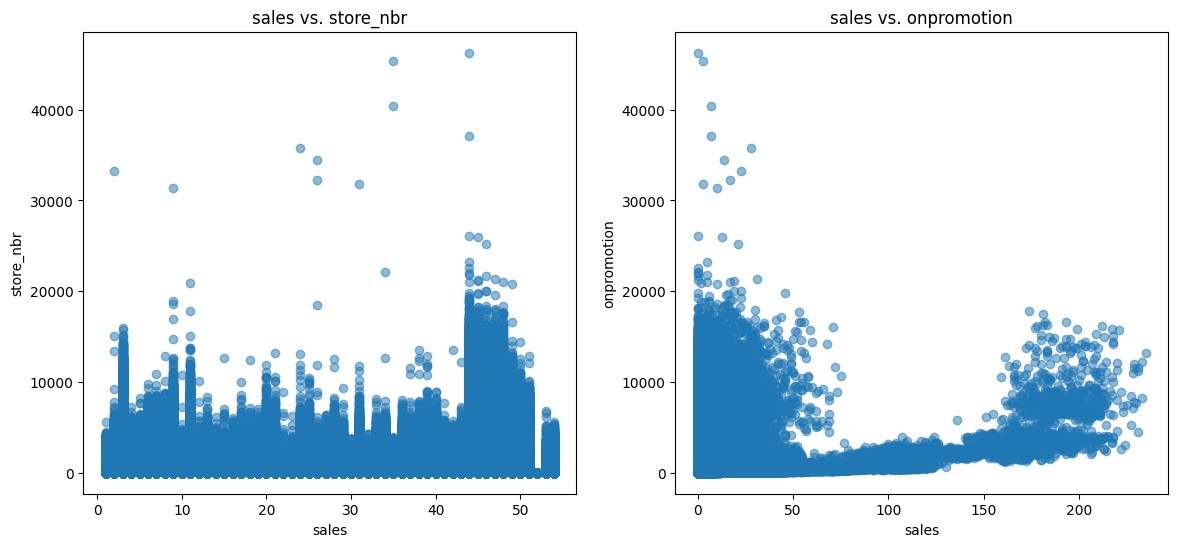

In [126]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
axes = axes.flatten()

axes[0].scatter(x=training_set_12_15['store_nbr'], y=training_set_12_15['sales'], alpha=0.5)
axes[0].set_title(f'sales vs. store_nbr')
axes[0].set_xlabel('sales')
axes[0].set_ylabel('store_nbr')

axes[1].scatter(x=training_set_12_15['onpromotion'], y=training_set_12_15['sales'], alpha=0.5)
axes[1].set_title(f'sales vs. onpromotion')
axes[1].set_xlabel('sales')
axes[1].set_ylabel('onpromotion')

plt.show()

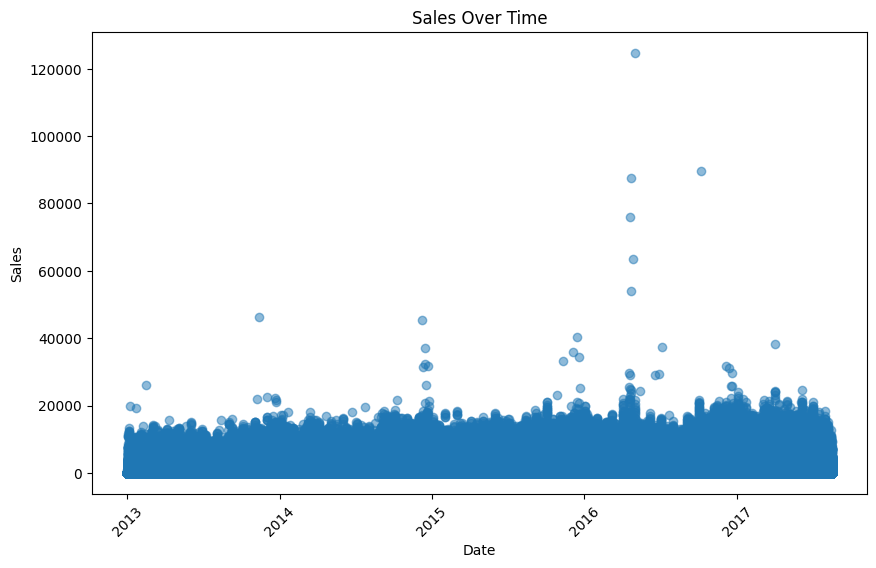

In [81]:
# cleanedts = training_set.groupby('store_nbr','date')['sales'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.scatter(training_set['date'], training_set['sales'], label='Sales Over Time', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('All Sales Over Time')
plt.xticks(rotation=45)
plt.show()

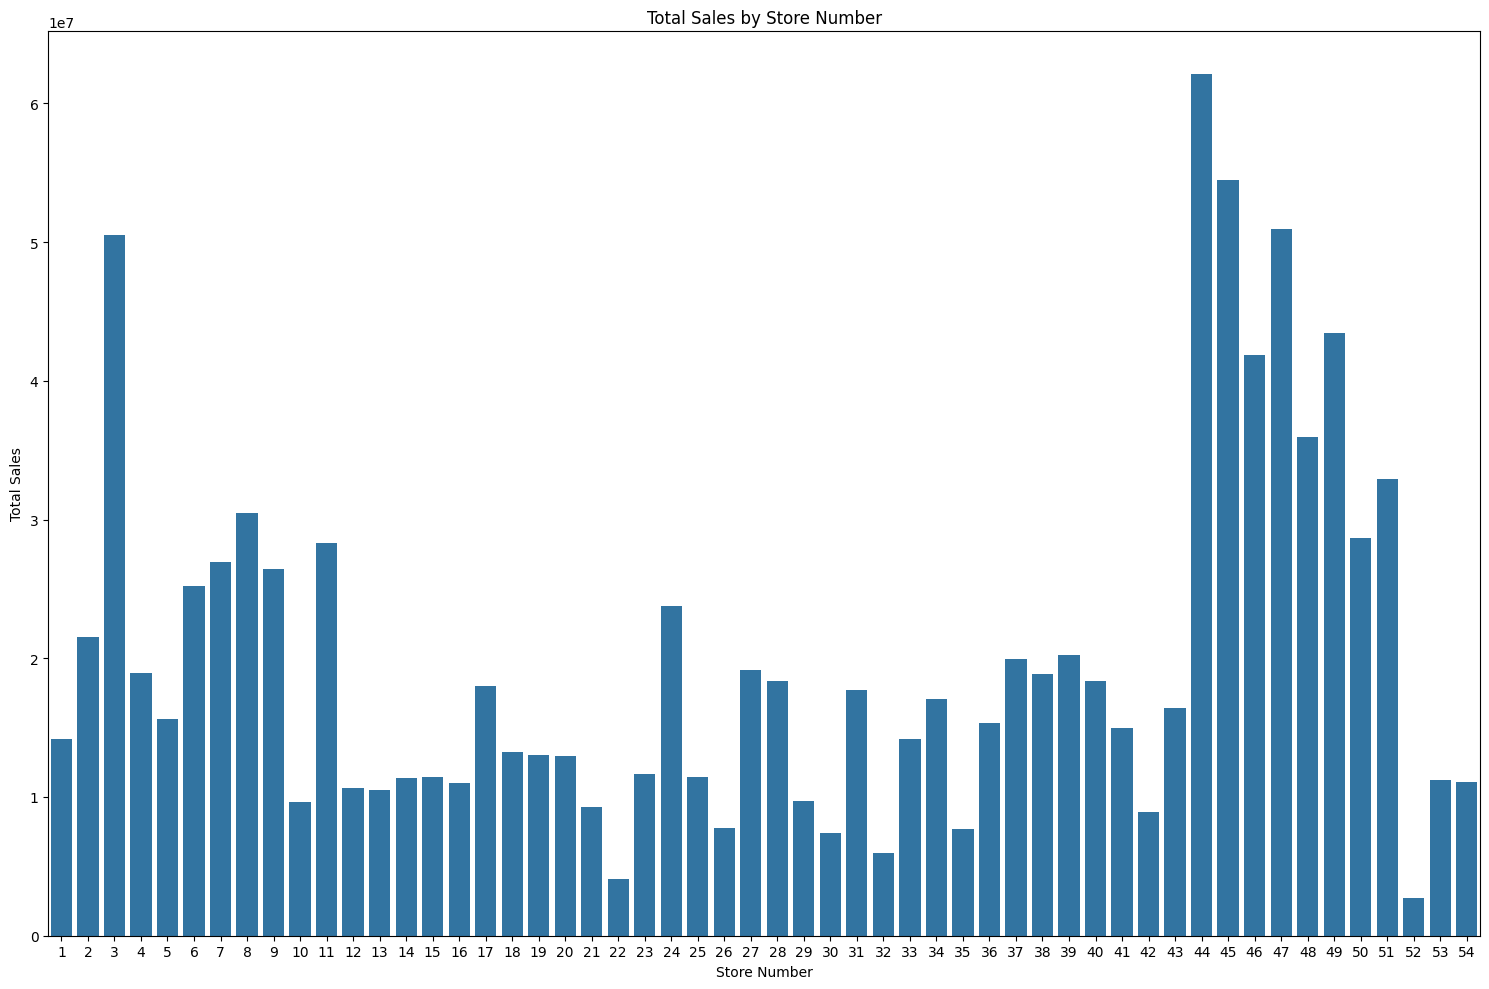

In [98]:
grouped_sales = training_set.groupby('store_nbr')['sales'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(data=grouped_sales,x='store_nbr', y='sales')

# Add labels and title
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Number')


# Show the plot
plt.tight_layout()
plt.show()
# Preview the grouped data
#print(grouped_sales.head())

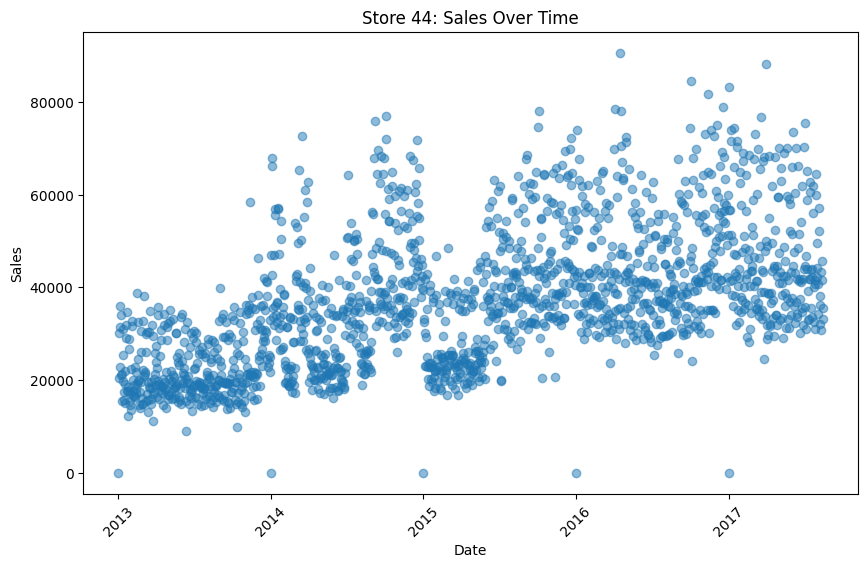

In [121]:
specific_store = training_set[(training_set['store_nbr'] == 44)]
specific_store_all_family = specific_store.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(specific_store_all_family['date'], specific_store_all_family['sales'], label='Sales Over Time', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Store 44: Sales Over Time')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Number of Sales at Store 44 Over The Week')

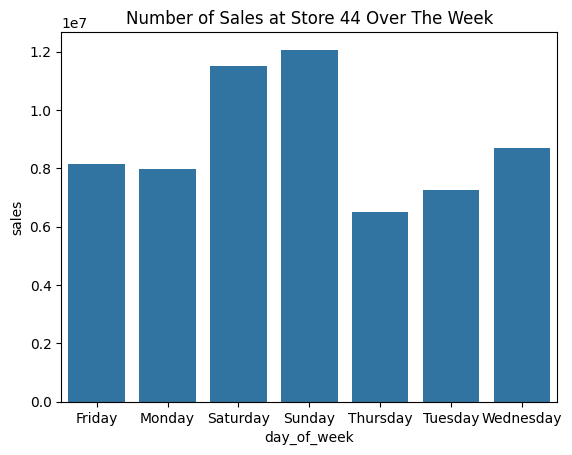

In [120]:
specific_store = training_set[(training_set['store_nbr'] == 44)]
specific_store_dow = specific_store.groupby('day_of_week')['sales'].sum().reset_index()
plot = sns.barplot(data = specific_store_dow, x='day_of_week', y='sales')
plot.set_title("Number of Sales at Store 44 Over The Week")

<Axes: xlabel='date', ylabel='dcoilwtico'>

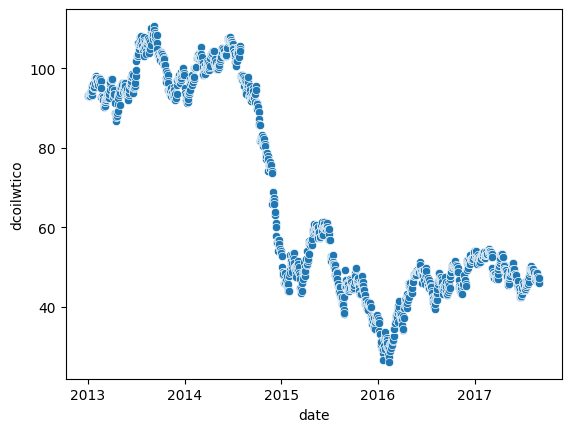

In [135]:
sns.scatterplot(data=oil_data, x='date', y='dcoilwtico')


Relevant Statistics Tables

In [ ]:
# transactions.csv
transactions_df = pd.read_csv('/content/DS3001_SalesProject/data/transactions.csv', low_memory=False)
print( transactions_df.shape, '\n')
# transactions_df.head()

# calc total transactions for a store
total_transactions = transactions_df.groupby('store_nbr')['transactions'].sum().reset_index()
print(total_transactions)

(83488, 3) 

    store_nbr  transactions
0           1       2553963
1           2       3219901
2           3       5366350
3           4       2519007
4           5       2347877
5           6       3065896
6           7       2995993
7           8       4637971
8           9       3516162
9          10       1652493
10         11       3972488
11         12       1958852
12         13       1572504
13         14       2287850
14         15       2209898
15         16       1464498
16         17       2295485
17         18       2071278
18         19       2107489
19         20       1422539
20         21        842891
21         22        504156
22         23       1788171
23         24       3568206
24         25       1520362
25         26       1065059
26         27       2485687
27         28       1957594
28         29        981448
29         30       1171130
30         31       2306044
31         32       1065226
32         33       1743003
33         34       3864018
34     

In [ ]:
# train.csv
train_df = pd.read_csv('/content/DS3001_SalesProject/data/train.csv', low_memory=False)
print( train_df.shape, '\n')
# train_df['sales'].describe()
train_df['family'].describe()

(3000888, 6) 



,family
count,3000888
unique,33
top,AUTOMOTIVE
freq,90936


In [ ]:
# stores.csv
stores_df = pd.read_csv('/content/DS3001_SalesProject/data/stores.csv', low_memory=False)
print( stores_df.shape, '\n')
stores_df['cluster'].value_counts()

(54, 5) 



,count
cluster,
3,7
6,6
10,6
15,5
13,4
14,4
11,3
4,3
8,3


In [ ]:
# oil.csv
oil_df = pd.read_csv('/content/DS3001_SalesProject/data/oil.csv', low_memory=False)
print( oil_df.shape, '\n')
oil_df.head()

(1218, 2) 



,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
# holidays_events.csv
holiday_df = pd.read_csv('/content/DS3001_SalesProject/data/holidays_events.csv', low_memory=False)
print( holiday_df.shape, '\n')
# holiday_df.head()
holiday_df.describe()

(350, 6) 



,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


What is in your data?
This data describes the sales of the product families sold at Favorita stores located in Ecuador. The train.csv dataset includes an id, date the item was sold, store nmbr which is the store the item was sold at, family which is what type of item it was, # sales for that item, and on promotion which indicates if the item was on sale or not. All of the data is numeric except for the family column. There are 1048574 rows of data in the dataset.

How will these data be useful for studying the phenomenon you're interested in? - Tulsi

What are the challenges you've resolved or expect to face in using them? - Chetu